In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
airbnb_cr = pd.read_csv('C:/users/guilh/Downloads/airbnb_cr.csv')
cal_change_r = pd.read_csv('C:/users/guilh/Downloads/cal_change_r.csv')
crimes = pd.read_csv('C:/users/guilh/Downloads/crimes.csv')
listings = pd.read_csv('C:/users/guilh/Downloads/listings.csv')
homicides = pd.read_csv('C:/users/guilh/Downloads/homicides.csv')
violence = pd.read_csv('C:/users/guilh/Downloads/violence.csv')
stealing = pd.read_csv('C:/users/guilh/Downloads/stealing.csv')
calendar = pd.read_csv('C:/users/guilh/Downloads/calendar.csv')

# Listings

In [3]:
listings.head()

,Unnamed: 0,listing_id,host_id,neighbourhood,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,lr_m,lr_d,lr_y,lat,lon,location,loc,loc_id,loc_id2
0,0,2384,2613,Hyde Park,41.78886,-87.58671,2,159,2.89,1,306,7,11,2019,41.79,-87.59,"(41.78886, -87.58671)","(41.79, -87.59)",124,71
1,1,2604454,13339125,Hyde Park,41.78977,-87.58916,1,85,1.42,3,41,7,11,2019,41.79,-87.59,"(41.789770000000004, -87.58915999999999)","(41.79, -87.59)",124,71
2,2,6524346,34121377,Hyde Park,41.79119,-87.59099,2,26,0.52,1,34,7,7,2019,41.79,-87.59,"(41.79119, -87.59099)","(41.79, -87.59)",124,71
3,3,18549719,47172572,Hyde Park,41.79296,-87.59275,1,127,4.77,60,96,7,2,2019,41.79,-87.59,"(41.79296, -87.59275)","(41.79, -87.59)",124,71
4,4,22320506,47172572,Hyde Park,41.79386,-87.59469,1,99,5.32,60,93,7,8,2019,41.79,-87.59,"(41.793859999999995, -87.59469)","(41.79, -87.59)",124,71


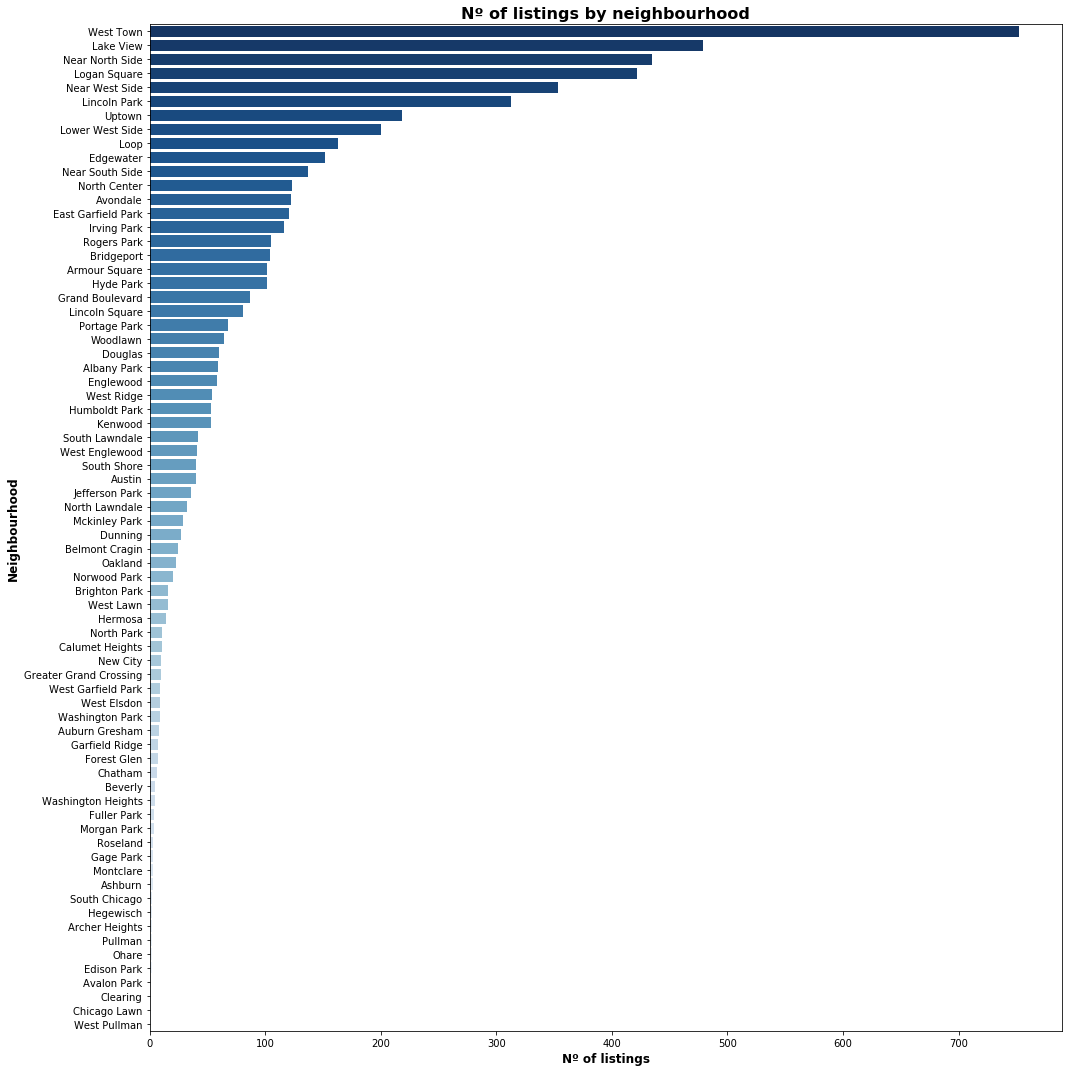

In [4]:
l=listings.groupby(['neighbourhood']).count()
l=l.sort_values(by='listing_id',ascending=False)
l=l.reset_index()
plt.figure(figsize=(15, 15))
g = sns.barplot(l.listing_id,l.neighbourhood,palette="Blues_r")
plt.title('Nº of listings by neighbourhood', fontweight="bold", fontsize=16)
plt.xlabel('Nº of listings', fontweight="demibold", fontsize=12)
plt.ylabel('Neighbourhood', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g1.png')

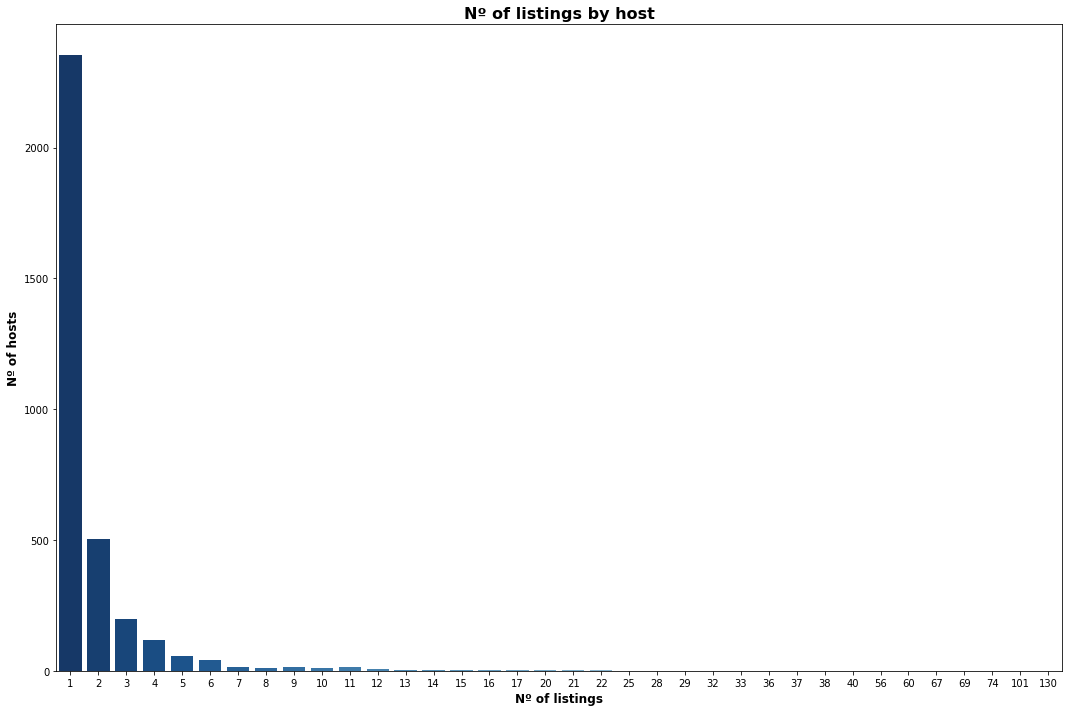

In [5]:
l=listings.drop_duplicates(subset='host_id')
l=l.groupby(['calculated_host_listings_count']).count()
l=l.reset_index()
l
plt.figure(figsize=(15, 10))
g = sns.barplot(l.calculated_host_listings_count,l.listing_id,palette="Blues_r")
plt.title('Nº of listings by host', fontweight="bold", fontsize=16)
plt.ylabel('Nº of hosts', fontweight="demibold",fontsize=12)
plt.xlabel('Nº of listings', fontweight="demibold",fontsize=12)
plt.tight_layout()
plt.savefig('g2.png')

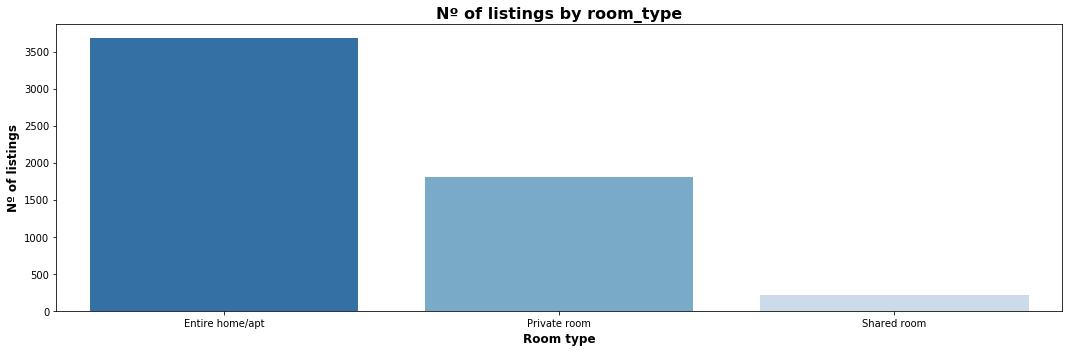

In [6]:
l=listings.groupby(['room_type']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id')
plt.figure(figsize=(15, 5))
g=sns.barplot(l.room_type,l.listing_id,palette="Blues_r")
plt.title('Nº of listings by room_type', fontweight="bold", fontsize=16)
plt.ylabel('Nº of listings', fontweight="demibold", fontsize=12)
plt.xlabel('Room type', fontweight="demibold", fontsize=12)
plt.xticks([0,1,2],['Entire home/apt','Private room','Shared room'])
plt.tight_layout()
plt.savefig('g3.png')

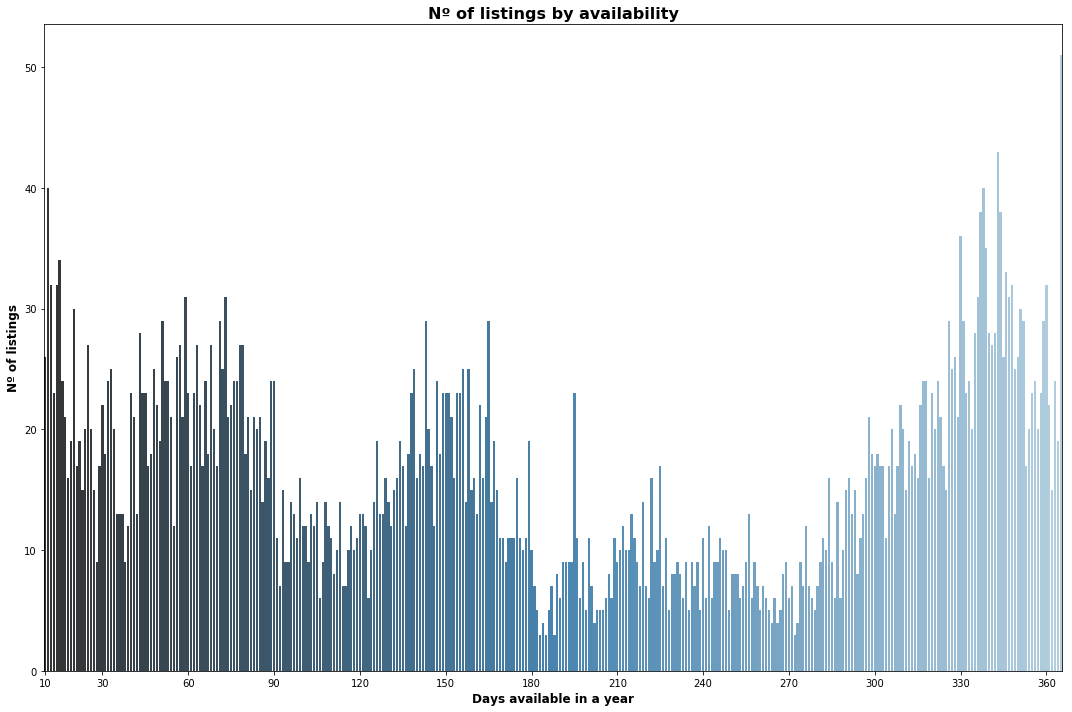

In [7]:
l=listings.groupby(['availability_365']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id')

plt.figure(figsize=(15, 10))
sns.barplot(l.availability_365,l.listing_id,palette="Blues_d")
plt.title('Nº of listings by availability', fontweight="bold", fontsize=16)
plt.ylabel('Nº of listings', fontweight="demibold", fontsize=12)
plt.xlabel('Days available in a year', fontweight="demibold", fontsize=12)
plt.xticks([0,20,50,80,110,140,170,200,230,260,290,320,350],[10,30,60,90,120,150,180,210,240,270,300,330,360])
plt.tight_layout()
plt.savefig('g4.png')

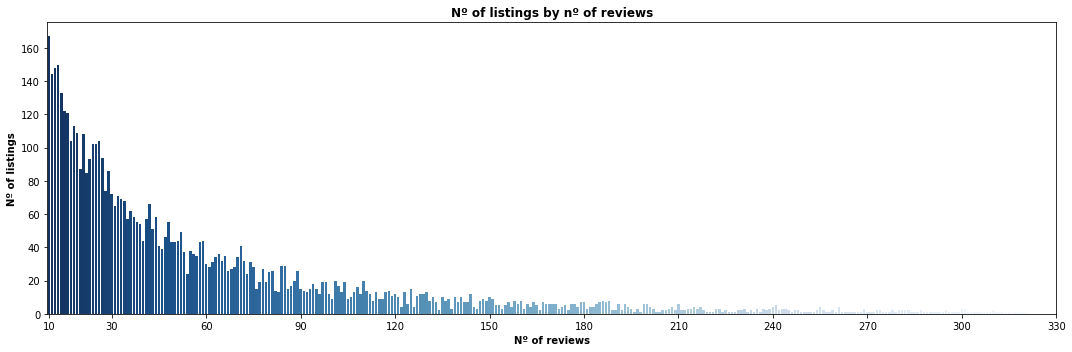

In [8]:
l=listings.groupby(['number_of_reviews']).count()
l=l.reset_index()
l=l.sort_values(by='listing_id',ascending=False)
plt.figure(figsize=(15, 5))
g = sns.barplot(l.number_of_reviews,l.listing_id,palette="Blues_r")
plt.title('Nº of listings by nº of reviews', fontweight="bold")
plt.ylabel('Nº of listings', fontweight="demibold")
plt.xlabel('Nº of reviews', fontweight="demibold")
plt.xticks([0,20,50,80,110,140,170,200,230,260,290,320],[10,30,60,90,120,150,180,210,240,270,300,330])
plt.tight_layout()
plt.savefig('g5.png')

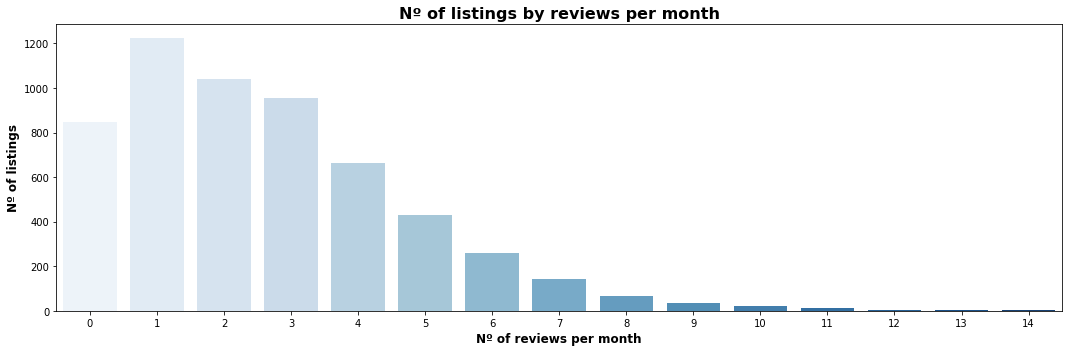

In [9]:
l=listings
l.reviews_per_month=np.floor(l.reviews_per_month)
l=listings.groupby(['reviews_per_month']).count()
l=l.reset_index()
l.reviews_per_month=l.reviews_per_month.astype(int)
l=l.sort_values(by='reviews_per_month',ascending=False)
plt.figure(figsize=(15, 5))
g = sns.barplot(l.reviews_per_month,l.listing_id,palette="Blues")
plt.title('Nº of listings by reviews per month', fontweight="bold", fontsize=16)
plt.ylabel('Nº of listings', fontweight="demibold", fontsize=12)
plt.xlabel('Nº of reviews per month', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g6.png')

# Crimes

In [10]:
crimes.head()

,Unnamed: 0,date,latitude,longitude,arrest,desc,lat,lon,location,loc,loc_id,month,day,year,crim_loc_id2
0,0,2018-07-09,41.894328,-87.628143,1,BATTERY,41.89,-87.63,"(41.894327845999996, -87.62814321)","(41.89, -87.63)",0,7,9,2018,0
1,1,2018-07-09,41.894265,-87.632665,0,ASSAULT,41.89,-87.63,"(41.894264966, -87.63266524)","(41.89, -87.63)",0,7,9,2018,0
2,2,2018-07-09,41.890337,-87.625330,0,CRIMINAL DAMAGE,41.89,-87.63,"(41.890336879, -87.62532976799999)","(41.89, -87.63)",0,7,9,2018,0
3,3,2018-07-09,41.890367,-87.626674,0,THEFT,41.89,-87.63,"(41.89036711, -87.626673634)","(41.89, -87.63)",0,7,9,2018,0
4,4,2018-07-09,41.886817,-87.629059,0,CRIMINAL DAMAGE,41.89,-87.63,"(41.886817001, -87.629059469)","(41.89, -87.63)",0,7,9,2018,0


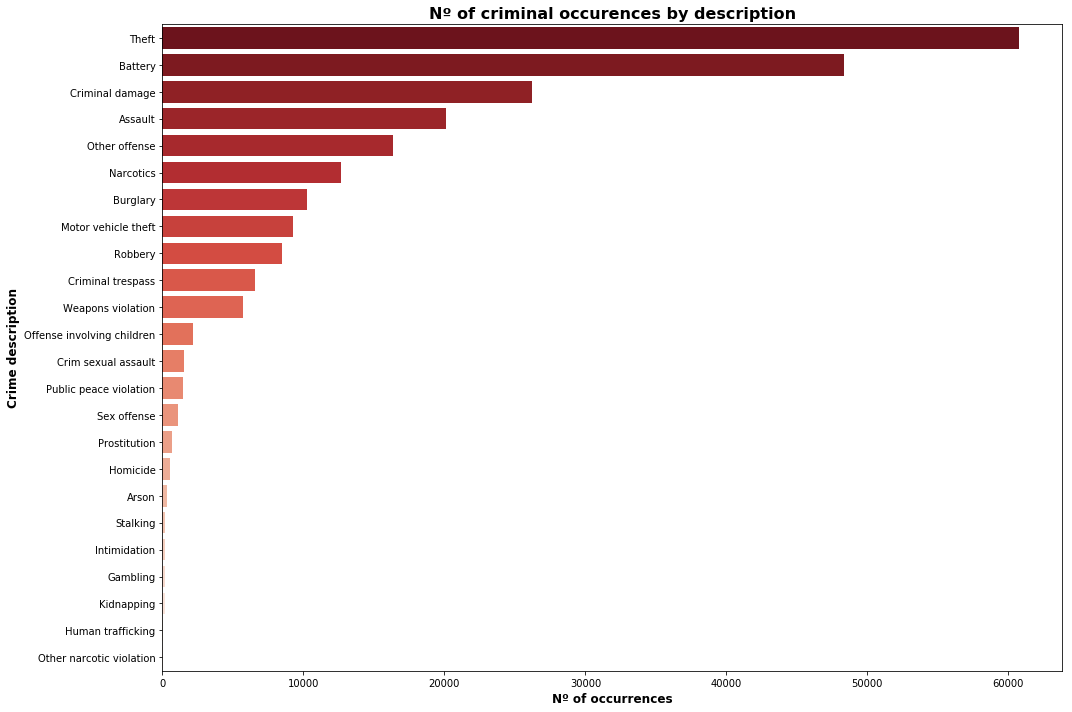

In [11]:
crimes.desc = crimes.desc.str.capitalize()
l=crimes.groupby(['desc']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
plt.figure(figsize=(15, 10))
sns.set_palette("Reds_r")
g = sns.barplot(l.loc_id,l.desc, palette="Reds_r")
plt.title('Nº of criminal occurences by description', fontweight="bold", fontsize=16)
plt.ylabel('Crime description', fontweight="demibold", fontsize=12)
plt.xlabel('Nº of occurrences', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g7.png')

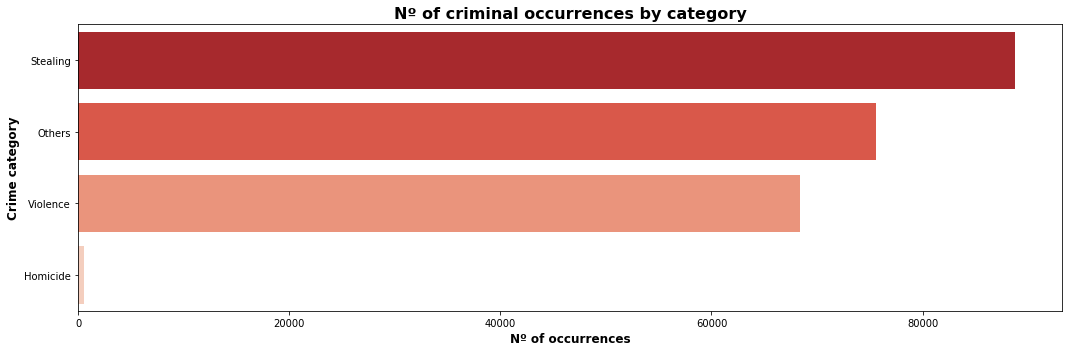

In [12]:
crimes['Description']='Others'
crimes.loc[crimes.desc=="Homicide",'Description']='Homicide'
crimes.loc[crimes.desc.isin(["Burglary", "Theft", "Robbery", "Motor vehicle theft"]),'Description']="Stealing"
crimes.loc[crimes.desc.isin(["Battery", "Assault"]),'Description']="Violence"

l=crimes.groupby(['Description']).count()
l=l.reset_index()
l=l.sort_values(by='loc_id',ascending=False)
plt.figure(figsize=(15, 5))
g = sns.barplot(l.loc_id,l.Description, palette="Reds_r")
plt.title('Nº of criminal occurrences by category', fontweight="bold", fontsize=16)
plt.ylabel('Crime category', fontweight="demibold", fontsize=12)
plt.xlabel('Nº of occurrences', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g8.png')

# Airbnb

In [13]:
airbnb_cr.head()

,Unnamed: 0,listing_id,date,price,month,day,year,host_id,neighbourhood,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,lr_m,lr_d,lr_y,lat,lon,location,loc,loc_id,crimes_that_date,crimes_count_date,homicides_that_date,homicides_count_date,stealing_that_date,stealing_count_date,violence_that_date,violence_count_date,date_id,crimes_loc_1km,crimes_loc_2km,crimes_loc_5km,homicides_loc_1km,homicides_loc_2km,homicides_loc_5km,stealing_loc_1km,stealing_loc_2km,stealing_loc_5km,violence_loc_1km,violence_loc_2km,violence_loc_5km,crimes_1km,crimes_2km,crimes_5km,homicides_1km,homicides_2km,homicides_5km,stealing_1km,stealing_2km,stealing_5km,violence_1km,violence_2km,violence_5km,crimes_1km_count,crimes_2km_count,crimes_5km_count,homicides_1km_count,homicides_2km_count,homicides_5km_count,stealing_1km_count,stealing_2km_count,stealing_5km_count,violence_1km_count,violence_2km_count,violence_5km_count
0,0,2384,2018-07-26,75.0,7,26,2018,2613,Hyde Park,41.78886,-87.58671,2,159,2.89,1,306,7,11,2019,41.79,-87.59,"(41.78886, -87.58671)","(41.79, -87.59)",71,[ 0 33 34 35 37 40 45 49 50 51 56 ...,731,[121 127],2,[ 0 26 28 30 38 44 53 55 56 61 64 ...,305,[ 25 32 41 43 48 52 53 54 56 60 63 ...,186,15,"[244, 245, 246]","[223, 224, 225, 243, 264, 265, 266, 267, 632, ...","[162, 163, 164, 165, 166, 178, 179, 180, 181, ...",[123],"[109, 110, 111]","[65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 8...","[236, 237, 238]","[215, 216, 217, 235, 256, 257, 258, 259, 618, ...","[154, 155, 156, 157, 158, 170, 171, 172, 173, ...","[235, 236, 237]","[214, 215, 216, 234, 255, 256, 257, 258, 619, ...","[153, 154, 155, 156, 157, 169, 170, 171, 172, ...","[244, 246]","[224, 225, 264, 265, 266, 633, 223]","[262, 263, 279, 281, 162, 163, 164, 165, 166, ...",[],[],[],[244],"[224, 267]","[289, 198, 166, 200, 263, 178, 184, 185, 282, ...",[],"[224, 243]","[163, 637, 263, 200, 202, 239, 281, 186, 221, ...",4,14,89,0,0,0,1,2,15,0,2,11
1,268,2384,2018-07-29,69.0,7,29,2018,2613,Hyde Park,41.78886,-87.58671,2,159,2.89,1,306,7,11,2019,41.79,-87.59,"(41.78886, -87.58671)","(41.79, -87.59)",71,[ 0 36 37 38 40 41 42 46 47 48 49 ...,731,[ 25 48 190],3,[ 0 31 34 40 42 44 54 55 68 74 76 ...,280,[ 0 29 32 38 50 53 55 78 80 98 105 1...,249,18,"[244, 245, 246]","[223, 224, 225, 243, 264, 265, 266, 267, 632, ...","[162, 163, 164, 165, 166, 178, 179, 180, 181, ...",[123],"[109, 110, 111]","[65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 8...","[236, 237, 238]","[215, 216, 217, 235, 256, 257, 258, 259, 618, ...","[154, 155, 156, 157, 158, 170, 171, 172, 173, ...","[235, 236, 237]","[214, 215, 216, 234, 255, 256, 257, 258, 619, ...","[153, 154, 155, 156, 157, 169, 170, 171, 172, ...",[],"[224, 225, 265, 266, 267, 243, 223]","[262, 263, 278, 279, 280, 281, 289, 162, 163, ...",[],[],[],[],"[225, 264, 265, 267, 243]","[162, 163, 291, 262, 263, 200, 202, 278, 184, ...",[],"[224, 225, 264, 265]","[292, 165, 166, 199, 263, 282, 304, 278, 183, ...",0,20,76,0,0,0,0,5,14,0,5,16
2,847,2384,2018-08-05,65.0,8,5,2018,2613,Hyde Park,41.78886,-87.58671,2,159,2.89,1,306,7,11,2019,41.79,-87.59,"(41.78886, -87.58671)","(41.79, -87.59)",71,[ 0 32 33 36 37 43 45 47 50 51 52 ...,811,[ 60 76 132 146 154 161 166 200],8,[ 0 29 30 43 44 50 54 55 56 73 78 ...,297,[ 0 24 25 39 49 51 53 54 55 57 63 ...,276,24,"[244, 245, 246]","[223, 224, 225, 243, 264, 265, 266, 267, 632, ...","[162, 163, 164, 165, 166, 178, 179, 180, 181, ...",[123],"[109, 110, 111]","[65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 8...","[236, 237, 238]","[215, 216, 217, 235, 256, 257, 258, 259, 618, ...","[154, 155, 156, 157, 158, 170, 171, 172, 173, ...","[235, 236, 237]","[214, 215, 216, 234, 255, 256, 257, 258, 619, ...","[153, 154, 155, 156, 157, 169, 170, 171, 172, ...",[246],"[265, 266, 267, 243, 223]","[262, 263, 280, 281, 289, 162, 163, 164, 165, ...",[],[],"[200, 166]",[],"[265, 267, 223]","[280, 162, 163, 204, 240, 180, 279, 184, 281, ...",[246],"[224, 225, 264]","[163, 165, 166, 

In [14]:
l=airbnb_cr.groupby(['month','year']).mean()
l=l.sort_values(by='year')
l.head()

,,Unnamed: 0,listing_id,price,day,host_id,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,lr_m,lr_d,lr_y,lat,lon,loc_id,crimes_count_date,homicides_count_date,stealing_count_date,violence_count_date,date_id,crimes_1km_count,crimes_2km_count,crimes_5km_count,homicides_1km_count,homicides_2km_count,homicides_5km_count,stealing_1km_count,stealing_2km_count,stealing_5km_count,violence_1km_count,violence_2km_count,violence_5km_count
month,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,2018,33948.212566,1.624665e+07,138.924364,21.464743,5.543405e+07,41.901671,-87.668903,1.421718,109.621649,3.717821,10.091344,203.000683,6.488475,16.278299,2018.973194,41.901494,-87.668887,208.426327,729.280007,2.534745,287.678675,214.767970,11.342325,5.417620,17.531159,89.938706,0.000512,0.005122,0.029025,1.696773,6.315178,34.213761,1.128223,4.323715,22.349667
8,2018,43751.898898,1.676305e+07,142.643278,14.945073,5.796363e+07,41.900684,-87.669559,1.437302,106.250641,3.776549,10.839143,204.853327,6.461144,16.053116,2018.977969,41.900579,-87.669507,206.929531,743.561038,2.642674,305.252603,207.248680,32.276747,5.643579,18.287913,94.142900,0.000754,0.004074,0.040290,1.786027,6.946129,37.498717,1.100951,4.223932,21.876264
9,2018,44485.849425,1.730077e+07,129.914166,15.687007,6.143256e+07,41.902054,-87.670099,1.413828,103.450147,3.779027,10.370629,204.228739,6.450936,16.183284,2018.983645,41.901896,-87.670032,208.938755,701.496278,2.140988,278.195917,210.115836,59.478683,5.404579,17.475637,88.713851,0.001579,0.004512,0.031130,1.620009,6.144936,33.436161,1.146628,4.400632,22.258741
10,2018,44842.425992,1.804214e+07,125.999896,16.199165,6.461002e+07,41.899196,-87.669390,1.407098,99.176827,3.845460,11.008455,198.943737,6.435804,16.408351,2018.982672,41.899088,-87.669300,204.800835,664.431524,2.197390,258.435595,194.893841,84.766493,5.034447,16.696347,86.158455,0.000835,0.003758,0.033090,1.496451,5.897495,31.813883,1.140919,4.185282,20.950209
11,2018,53594.994339,1.941262e+07,108.964831,16.260937,6.932190e+07,41.898738,-87.666727,1.324927,107.133985,4.510122,12.079259,190.463373,6.468176,15.918339,2018.992966,41.898672,-87.666708,203.879739,608.718477,2.075999,236.566650,173.405215,108.384972,4.975296,15.549151,78.669412,0.002745,0.008921,0.050952,1.416881,5.381712,28.925373,1.099846,3.966032,19.454109


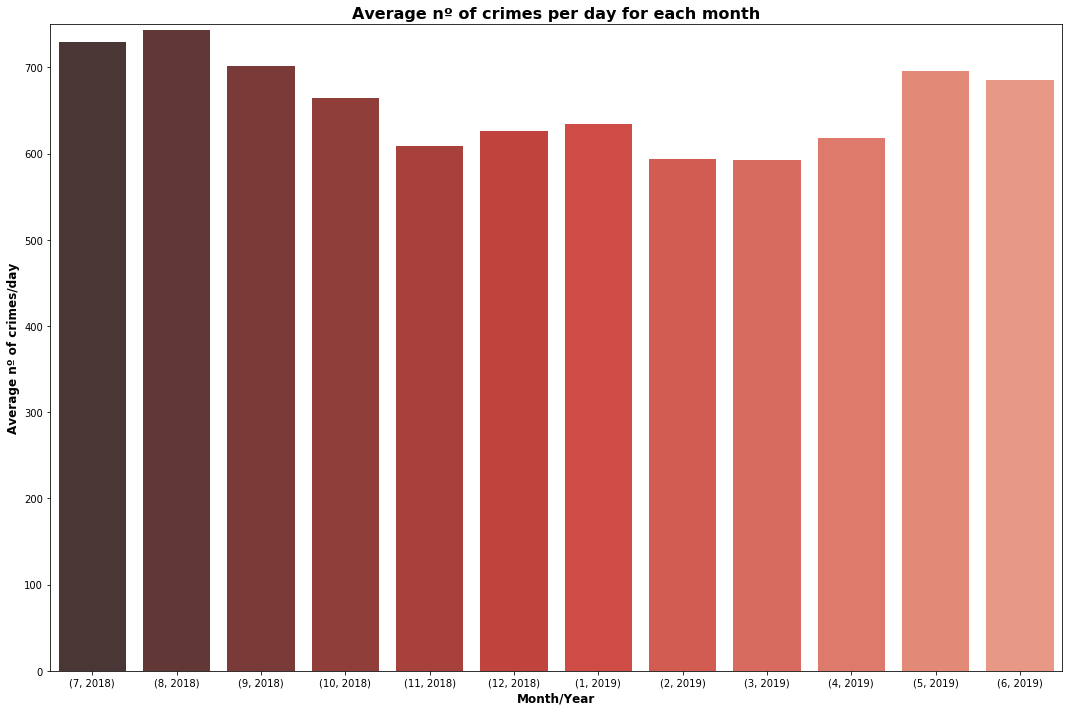

In [15]:
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.crimes_count_date,palette="Reds_d")
plt.title('Average nº of crimes per day for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average nº of crimes/day', fontweight="demibold", fontsize=12)
plt.xlabel('Month/Year', fontweight="demibold", fontsize=12)
plt.ylim(0,750)
plt.tight_layout()
plt.savefig('g9.png')

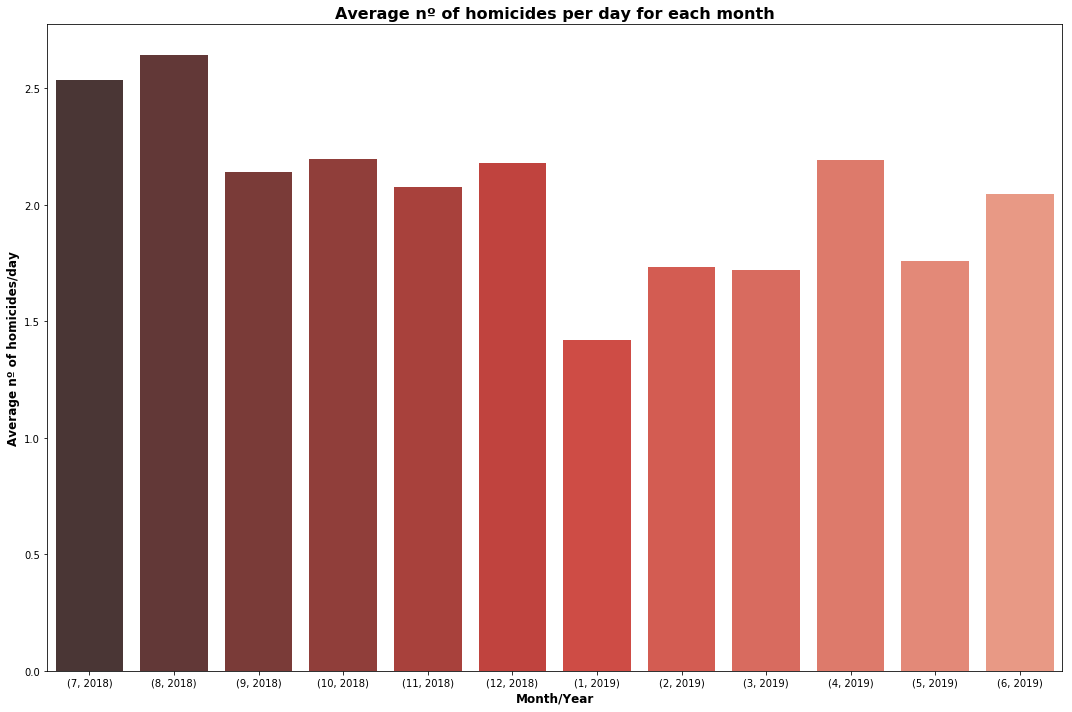

In [16]:
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.homicides_count_date,palette=("Reds_d"))
plt.title('Average nº of homicides per day for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average nº of homicides/day', fontweight="demibold", fontsize=12)
plt.xlabel('Month/Year', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g10.png')

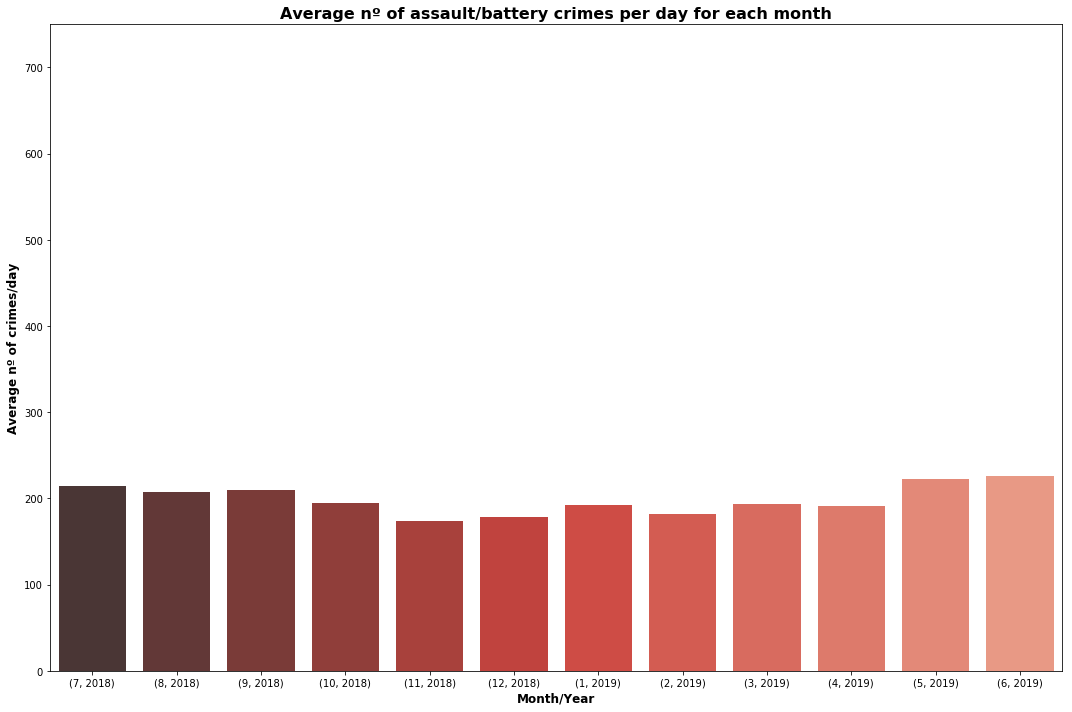

In [17]:
sns.set_palette("Blues")
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.violence_count_date, palette="Reds_d")
plt.title('Average nº of assault/battery crimes per day for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average nº of crimes/day', fontweight="demibold", fontsize=12)
plt.ylim(0,750)
plt.xlabel('Month/Year', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g11.png')

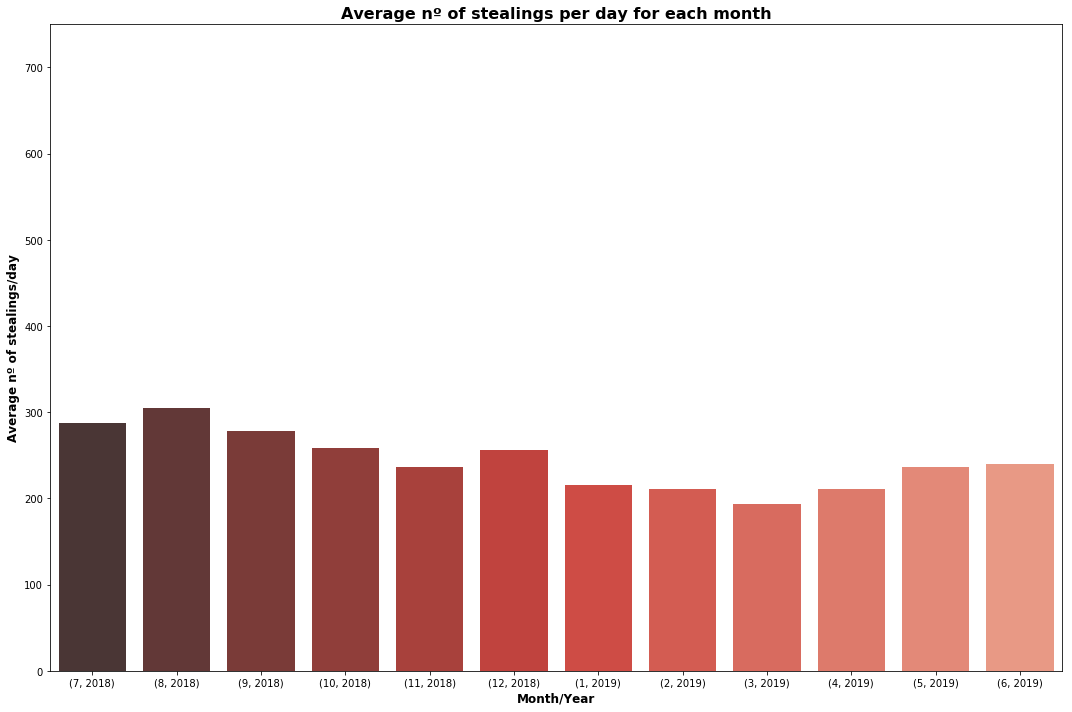

In [18]:
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.stealing_count_date, palette="Reds_d")
plt.title('Average nº of stealings per day for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average nº of stealings/day', fontweight="demibold", fontsize=12)
plt.ylim(0,750)
plt.xlabel('Month/Year', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g12.png')

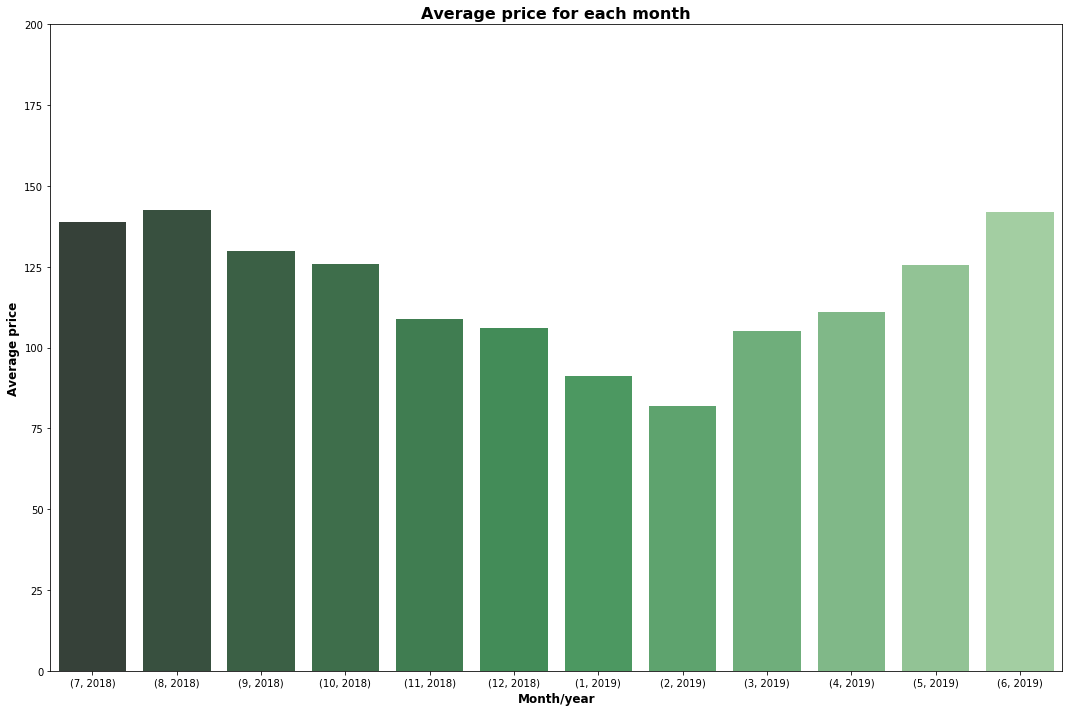

In [19]:
l=airbnb_cr.groupby(['month','year']).mean()
l=l.sort_values(by=['year','month'])
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.price, palette="Greens_d")
plt.title('Average price for each month', fontweight="bold",fontsize=16)
plt.ylabel('Average price', fontweight="demibold",fontsize=12)
plt.xlabel('Month/year', fontweight="demibold",fontsize=12)
plt.yticks([0,25,50,75,100,125,150,175,200],[0,25,50,75,100,125,150,175,200])
plt.tight_layout()
plt.savefig('g13.png')

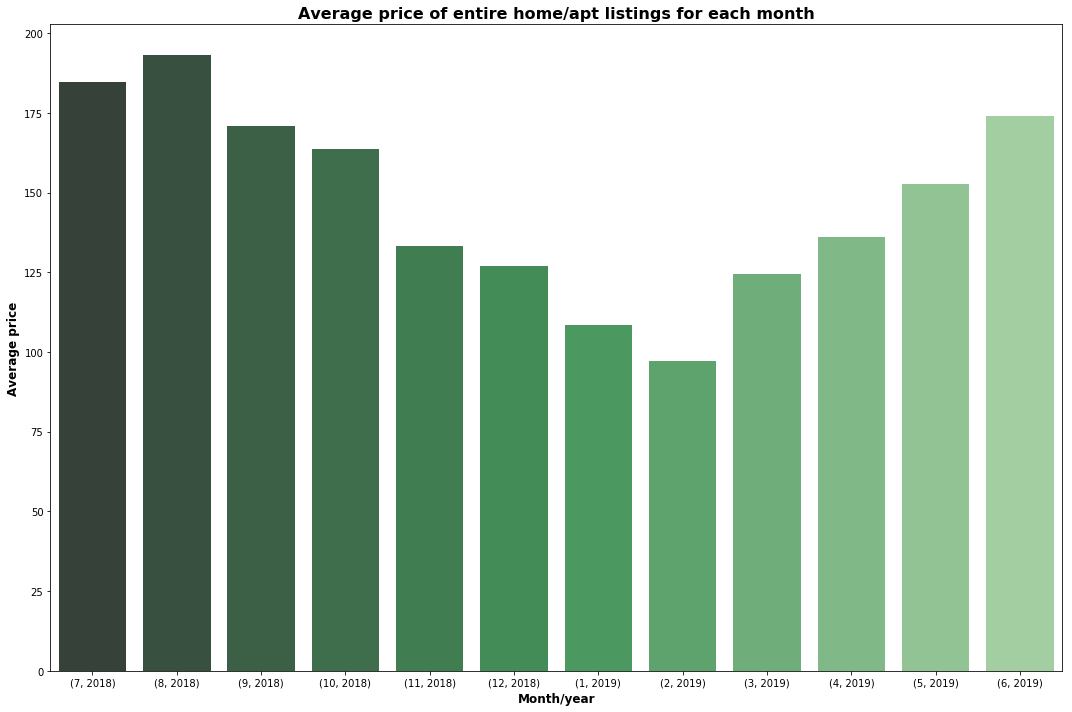

In [20]:
l=airbnb_cr[airbnb_cr['room_type']==1]
l=l.groupby(['month','year']).mean()
l=l.sort_values(by=['year','month'])
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.price, palette="Greens_d")
plt.title('Average price of entire home/apt listings for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average price', fontweight="demibold", fontsize=12)
plt.xlabel('Month/year', fontweight="demibold", fontsize=12)
plt.yticks([0,25,50,75,100,125,150,175,200],[0,25,50,75,100,125,150,175,200])
plt.tight_layout()
plt.savefig('g14.png')

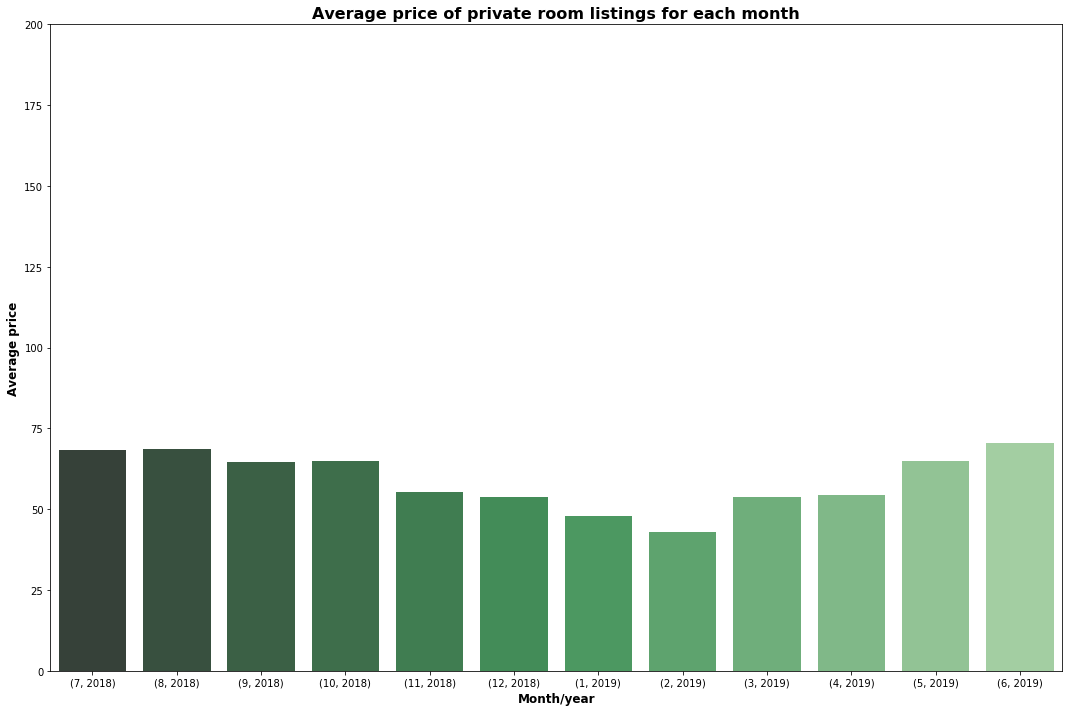

In [21]:
l=airbnb_cr[airbnb_cr['room_type']==2]
l=l.groupby(['month','year']).mean()
l=l.sort_values(by=['year','month'])
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.price, palette="Greens_d")
plt.title('Average price of private room listings for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average price', fontweight="demibold", fontsize=12)
plt.xlabel('Month/year', fontweight="demibold", fontsize=12)
plt.yticks([0,25,50,75,100,125,150,175,200],[0,25,50,75,100,125,150,175,200])
plt.tight_layout()
plt.savefig('g15.png')

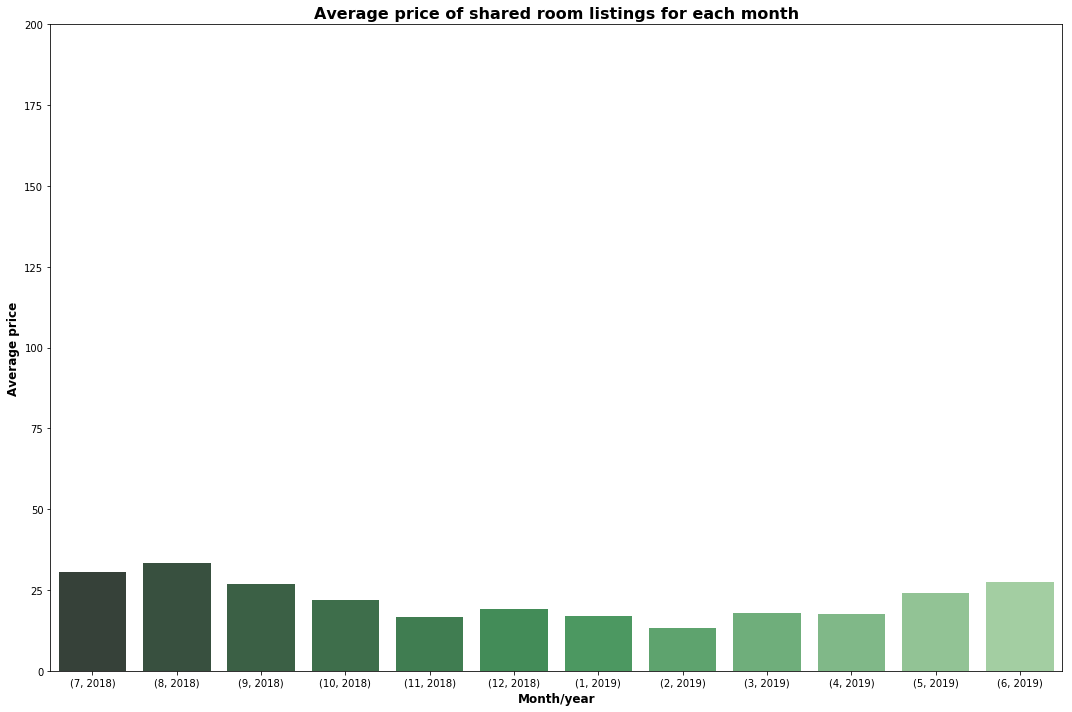

In [22]:
l=airbnb_cr[airbnb_cr['room_type']==3]
l=l.groupby(['month','year']).mean()
l=l.sort_values(by=['year','month'])
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.price, palette="Greens_d")
plt.title('Average price of shared room listings for each month', fontweight="bold", fontsize=16)
plt.ylabel('Average price', fontweight="demibold", fontsize=12)
plt.xlabel('Month/year', fontweight="demibold", fontsize=12)
plt.yticks([0,25,50,75,100,125,150,175,200],[0,25,50,75,100,125,150,175,200])
plt.tight_layout()
plt.savefig('g16.png')

In [23]:
l=airbnb_cr.groupby(['month','year']).count()
l=l.sort_values(by='year')
l.head()

,,Unnamed: 0,listing_id,date,price,day,host_id,neighbourhood,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,lr_m,lr_d,lr_y,lat,lon,location,loc,loc_id,crimes_that_date,crimes_count_date,homicides_that_date,homicides_count_date,stealing_that_date,stealing_count_date,violence_that_date,violence_count_date,date_id,crimes_loc_1km,crimes_loc_2km,crimes_loc_5km,homicides_loc_1km,homicides_loc_2km,homicides_loc_5km,stealing_loc_1km,stealing_loc_2km,stealing_loc_5km,violence_loc_1km,violence_loc_2km,violence_loc_5km,crimes_1km,crimes_2km,crimes_5km,homicides_1km,homicides_2km,homicides_5km,stealing_1km,stealing_2km,stealing_5km,violence_1km,violence_2km,violence_5km,crimes_1km_count,crimes_2km_count,crimes_5km_count,homicides_1km_count,homicides_2km_count,homicides_5km_count,stealing_1km_count,stealing_2km_count,stealing_5km_count,violence_1km_count,violence_2km_count,violence_5km_count
month,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,2018,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857,5857
8,2018,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627
9,2018,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866,8866
10,2018,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580,9580
11,2018,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829,5829


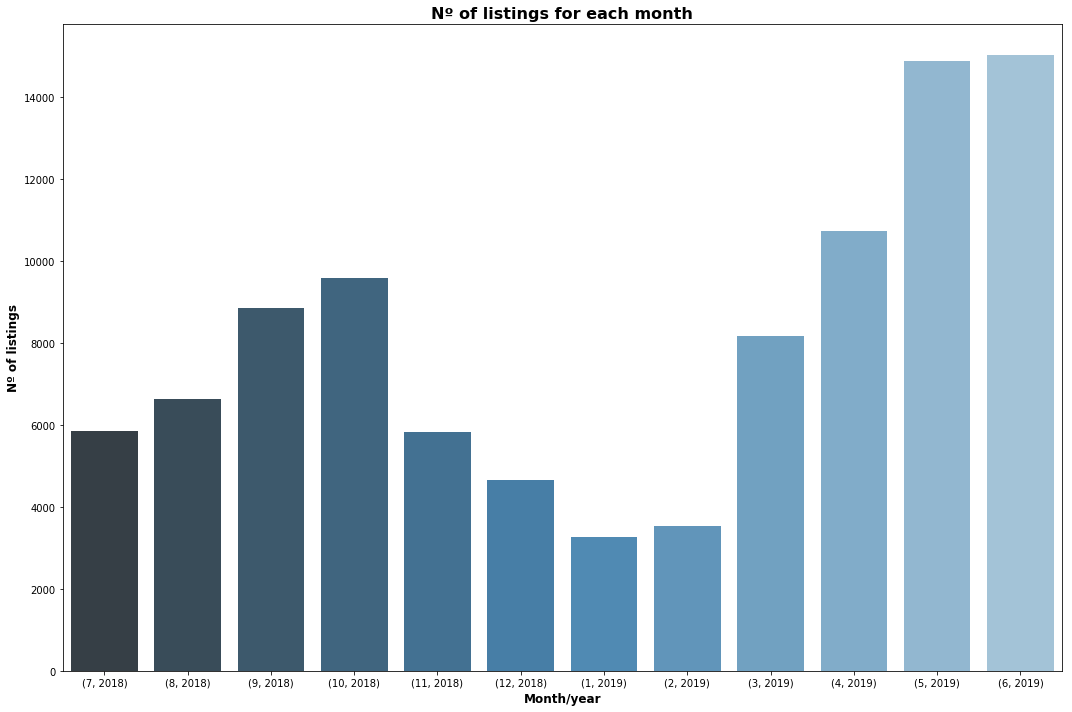

In [24]:
plt.figure(figsize=(15, 10))
g = sns.barplot(l.index,l.date, palette="Blues_d")
plt.title('Nº of listings for each month', fontweight="bold", fontsize=16)
plt.ylabel('Nº of listings', fontweight="demibold", fontsize=12)
plt.xlabel('Month/year', fontweight="demibold", fontsize=12)
plt.tight_layout()
plt.savefig('g17.png')

In [25]:
k=airbnb_cr.groupby(['loc_id']).mean()
k=k.sort_values(by='price')
k=k.reset_index()
k['loc_id2']=k.index
k=k[['loc_id','loc_id2']]

l=airbnb_cr.merge(k)
l.crimes_5km_count=l.crimes_1km_count+l.crimes_2km_count+l.crimes_5km_count
l.homicides_5km_count=l.homicides_1km_count+l.homicides_2km_count+l.homicides_5km_count
airbnb_cr.head()
l=l.groupby(['loc_id2','month','year']).mean()
l=l.reset_index()
l=l.replace({'month': {1: '01', 2: '02', 3: '03', 4: '04', 5: '05', 6: '06', 7: '07', 8: '08', 9: '09'}})
l['year/month']="("+l['year'].map(str)+", "+l['month'].map(str)+")"

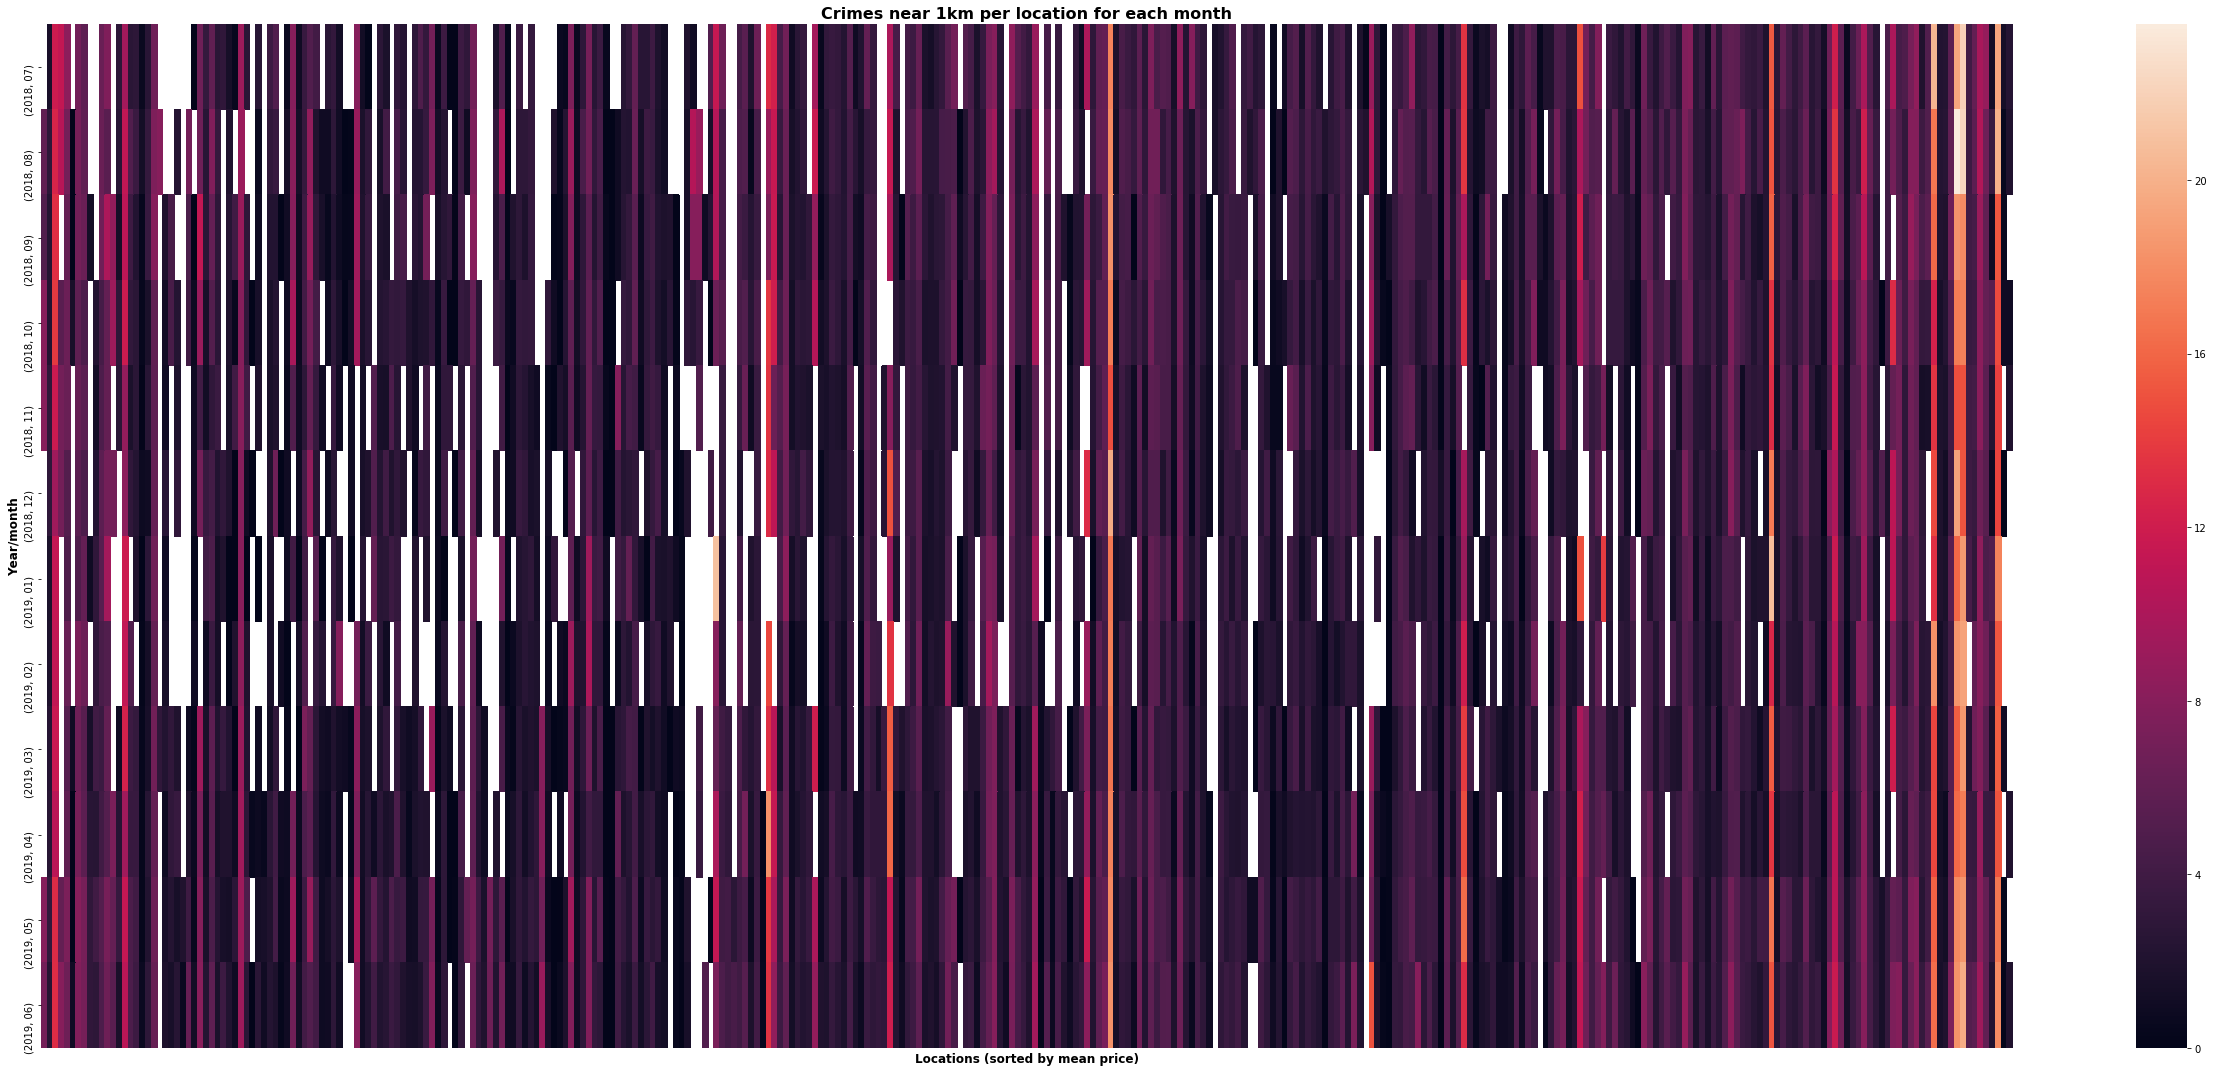

In [26]:
l1=l.pivot('year/month','loc_id2','crimes_1km_count')
plt.figure(figsize=(35, 15))
g=sns.heatmap(l1)
plt.title('Crimes near 1km per location for each month', fontweight="bold", fontsize=16)
plt.xlabel('Locations (sorted by mean price)', fontweight="demibold", fontsize=12)
plt.ylabel('Year/month', fontweight="demibold", fontsize=12)
plt.xticks([],[])
plt.tight_layout()
plt.savefig('g18.png')

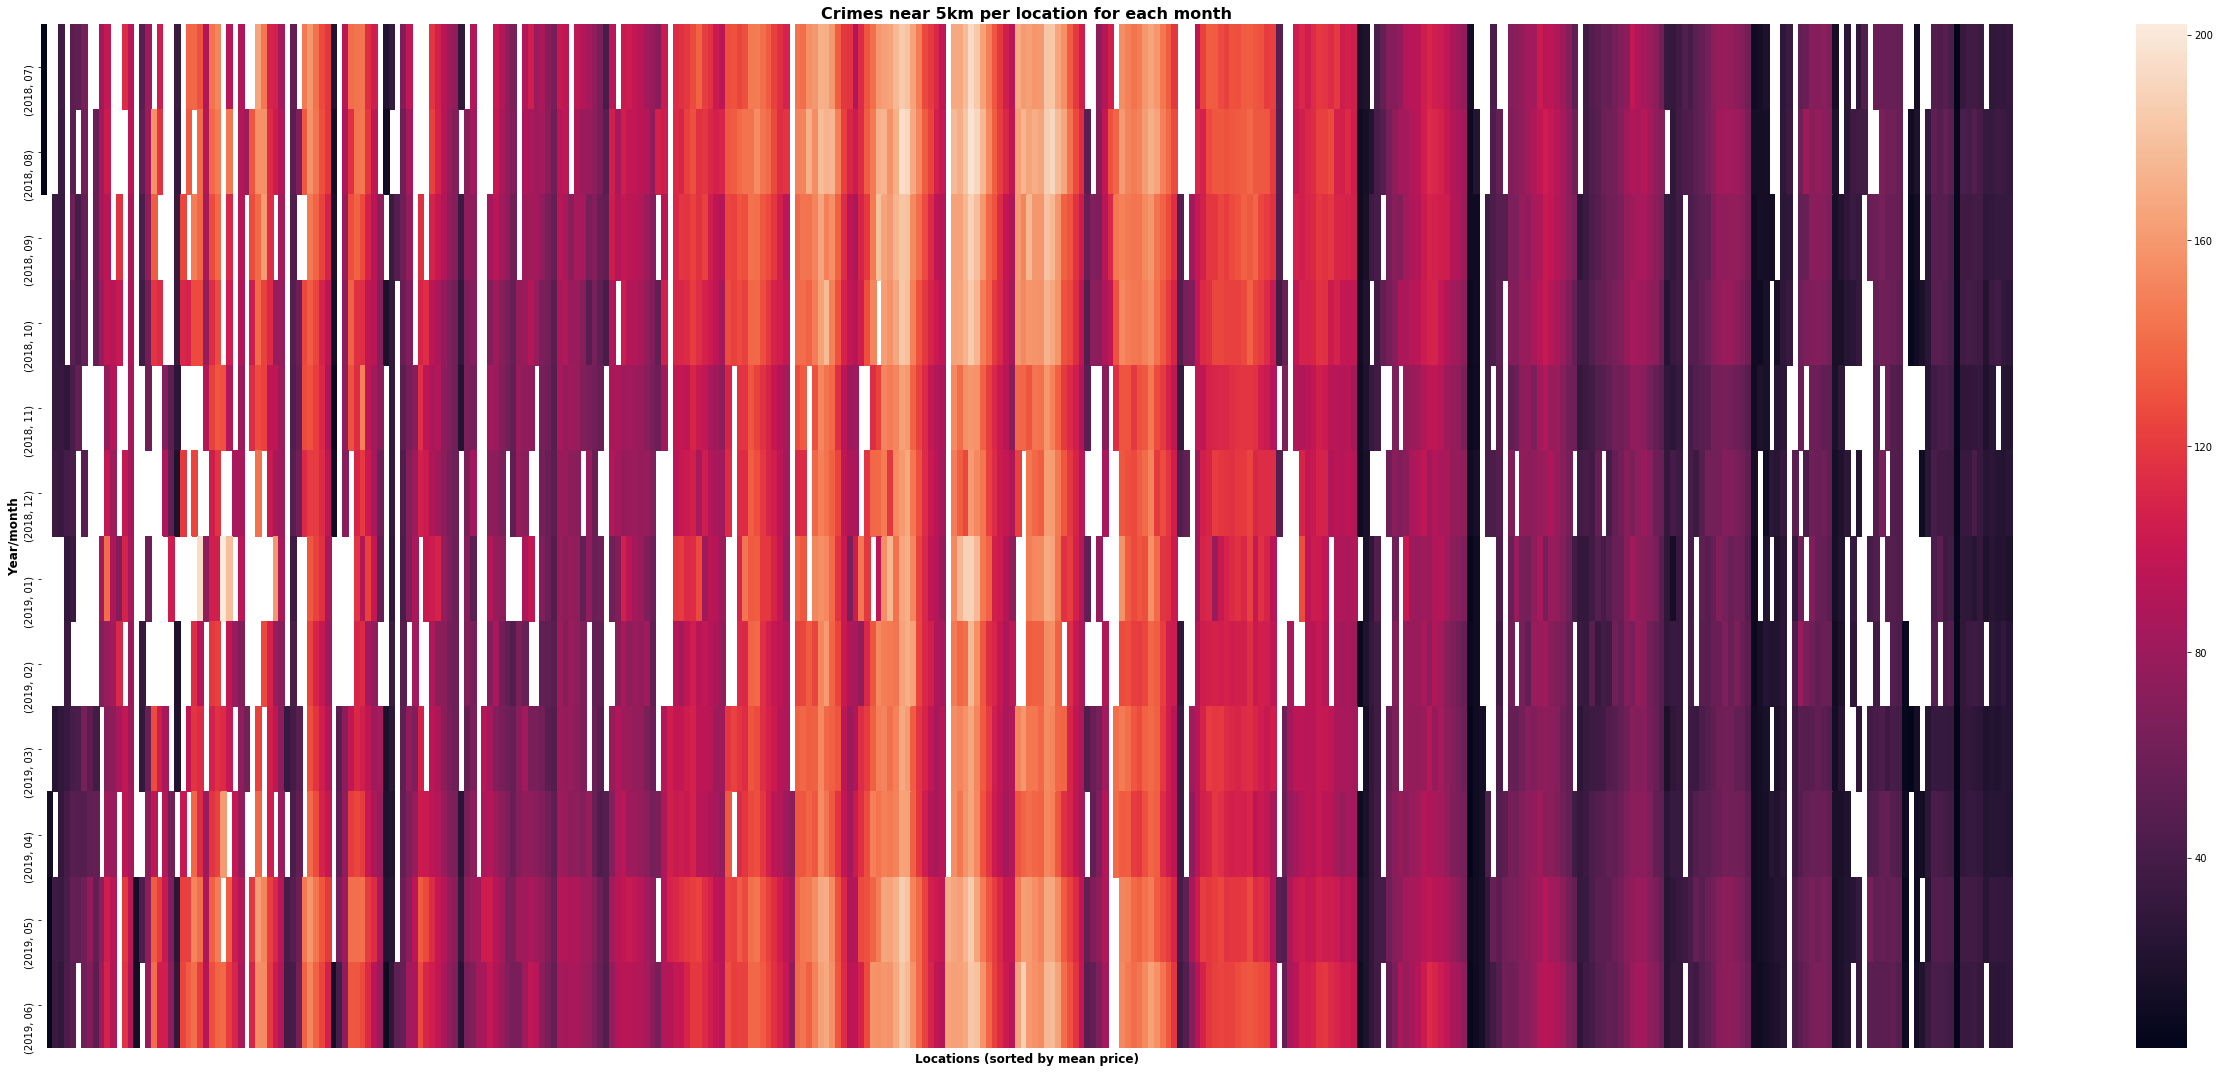

In [27]:
l2=l.pivot('year/month','loc_id','crimes_5km_count')
plt.figure(figsize=(35, 15))
g=sns.heatmap(l2)
plt.title('Crimes near 5km per location for each month', fontweight="bold", fontsize=16)
plt.xlabel('Locations (sorted by mean price)', fontweight="demibold", fontsize=12)
plt.ylabel('Year/month', fontweight="demibold", fontsize=12)
plt.xticks([],[])
plt.tight_layout()
plt.savefig('g19.png')

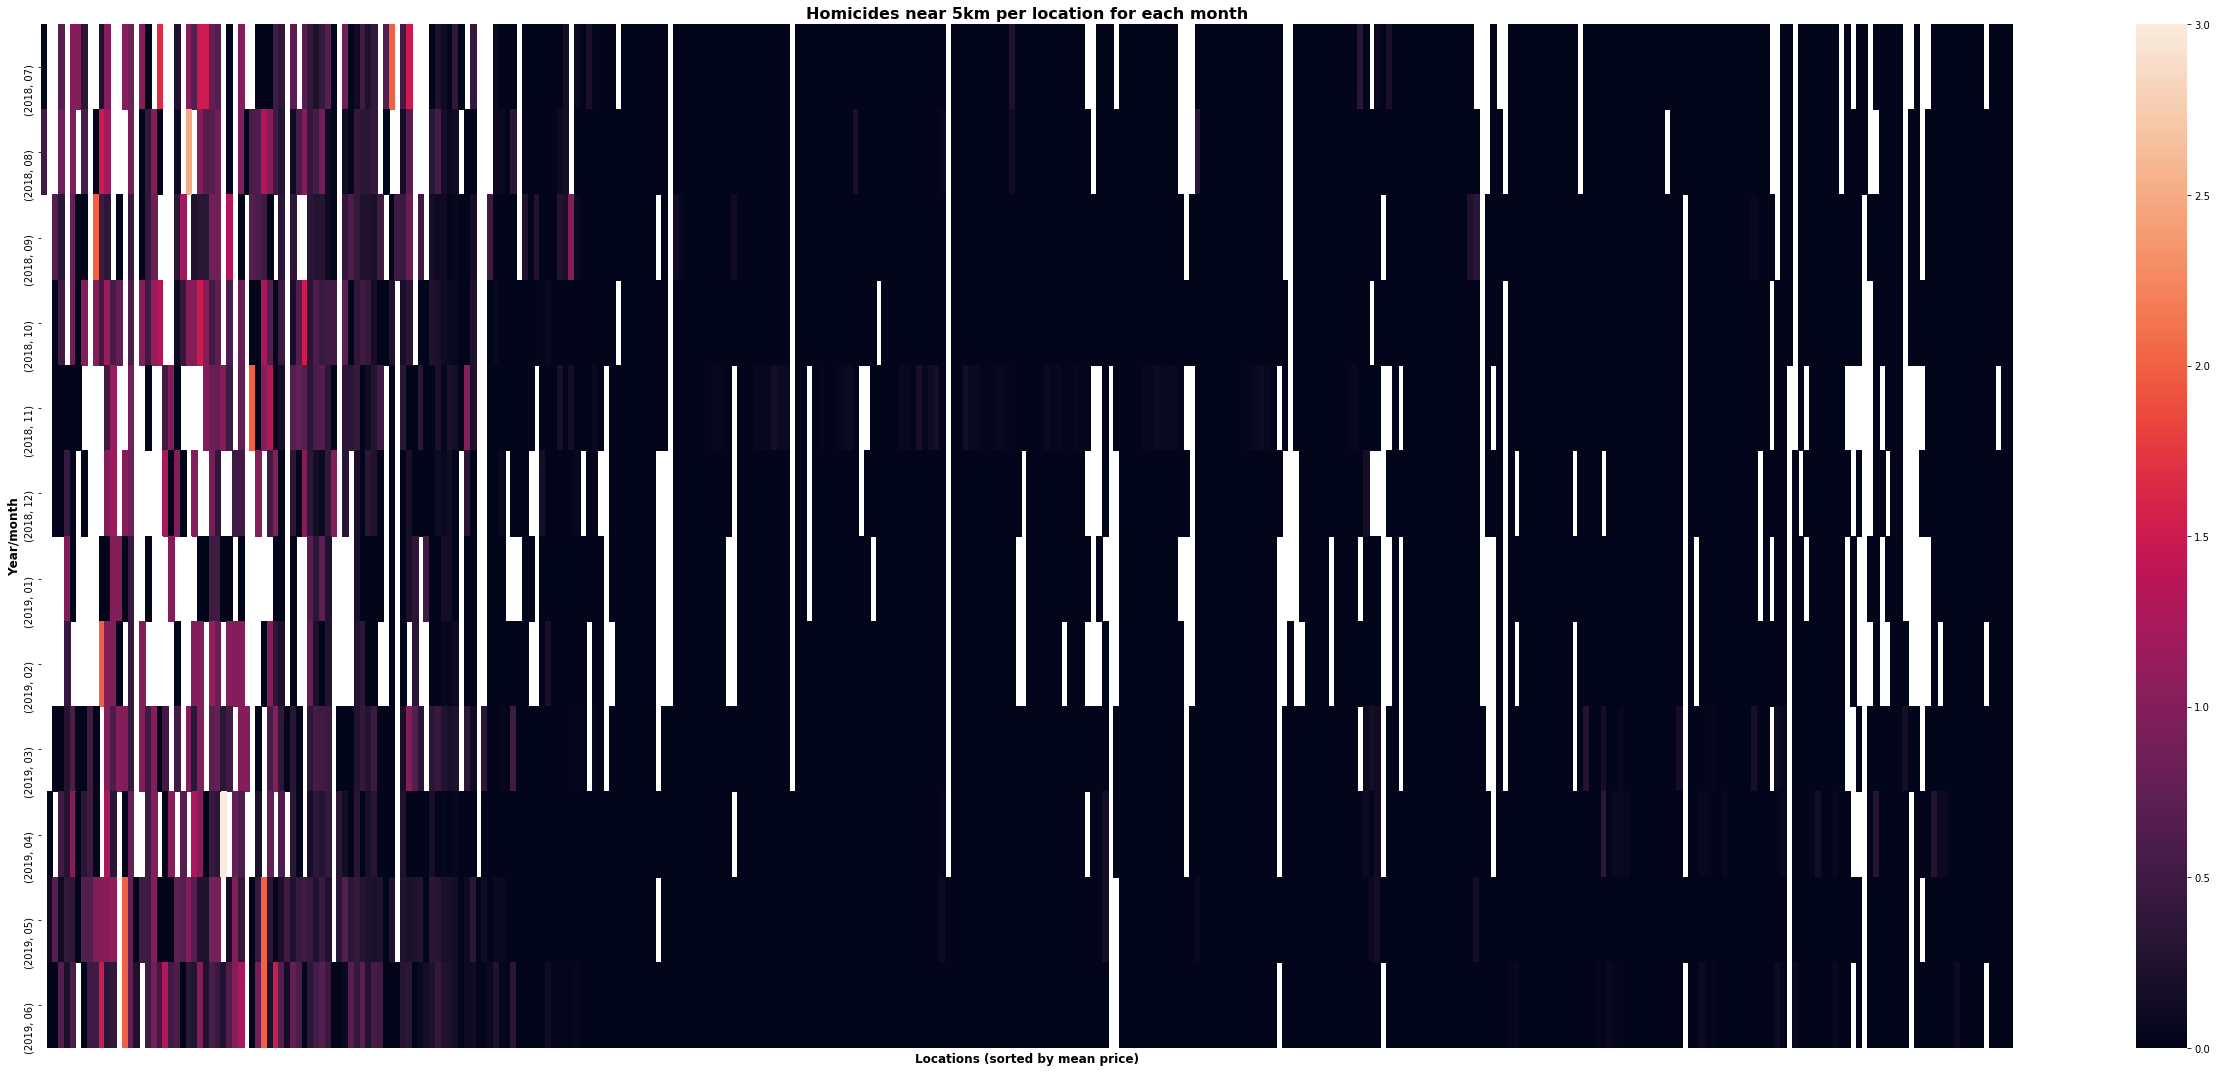

In [28]:
l3=l.pivot('year/month','loc_id','homicides_5km_count')
plt.figure(figsize=(35, 15))
g=sns.heatmap(l3)
plt.title('Homicides near 5km per location for each month', fontweight="bold", fontsize=16)
plt.xlabel('Locations (sorted by mean price)', fontweight="demibold", fontsize=12)
plt.ylabel('Year/month', fontweight="demibold", fontsize=12)
plt.xticks([],[])
plt.tight_layout()
plt.savefig('g20.png')

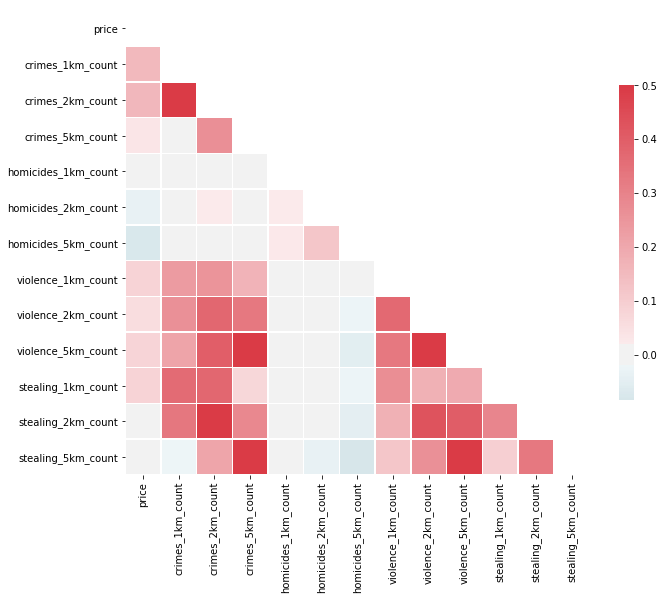

In [29]:
Z=airbnb_cr[['price','crimes_1km_count','crimes_2km_count','crimes_5km_count',
             'homicides_1km_count','homicides_2km_count','homicides_5km_count',
             'violence_1km_count','violence_2km_count','violence_5km_count',
             'stealing_1km_count','stealing_2km_count','stealing_5km_count']]
corr = Z.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('g21.png')

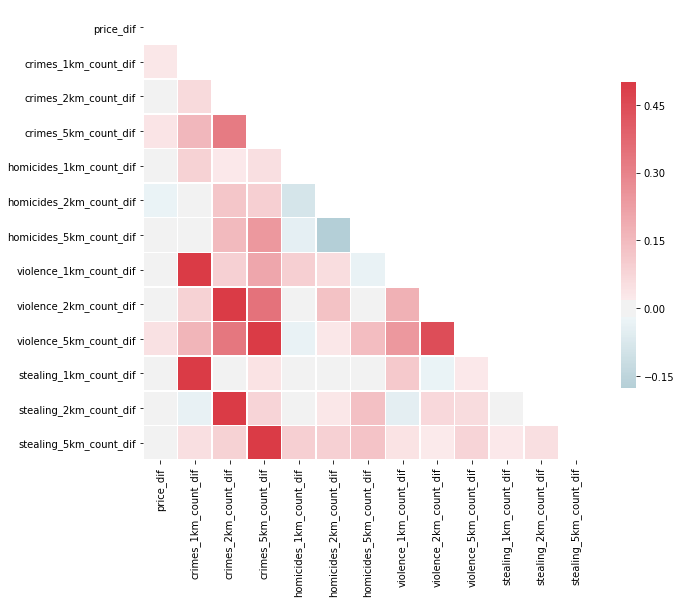

In [30]:
Z=cal_change_r[['price_dif','crimes_1km_count_dif','crimes_2km_count_dif','crimes_5km_count_dif',
             'homicides_1km_count_dif','homicides_2km_count_dif','homicides_5km_count_dif',
             'violence_1km_count_dif','violence_2km_count_dif','violence_5km_count_dif',
             'stealing_1km_count_dif','stealing_2km_count_dif','stealing_5km_count_dif']]

corr = Z.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('g22.png')

C:\Users\guilh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


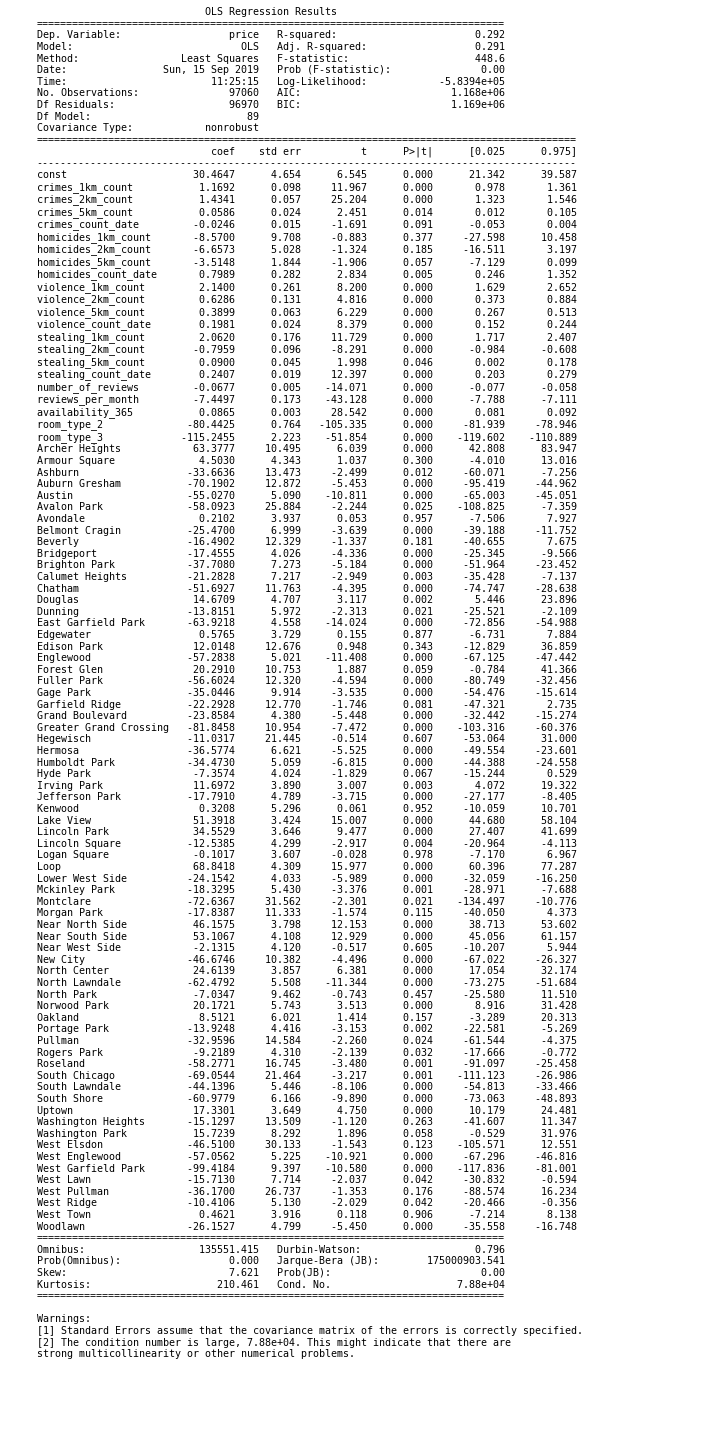

In [31]:
X = airbnb_cr[['crimes_1km_count','crimes_2km_count','crimes_5km_count','crimes_count_date',
               'homicides_1km_count','homicides_2km_count','homicides_5km_count','homicides_count_date',
               'violence_1km_count','violence_2km_count','violence_5km_count','violence_count_date',
               'stealing_1km_count','stealing_2km_count','stealing_5km_count','stealing_count_date',
               'room_type','neighbourhood','number_of_reviews','reviews_per_month','availability_365']]
y = airbnb_cr[['price']]

X = pd.concat([X, pd.get_dummies(X.room_type, prefix='room_type', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X.neighbourhood, drop_first=True)], axis=1)

X=X.drop(['neighbourhood','room_type'],axis=1)

reg = LinearRegression().fit(X, y)


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

plt.rc('figure', figsize=(10, 20))
plt.text(0.01, 0.05, str(est2.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('reg1.png')

C:\Users\guilh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


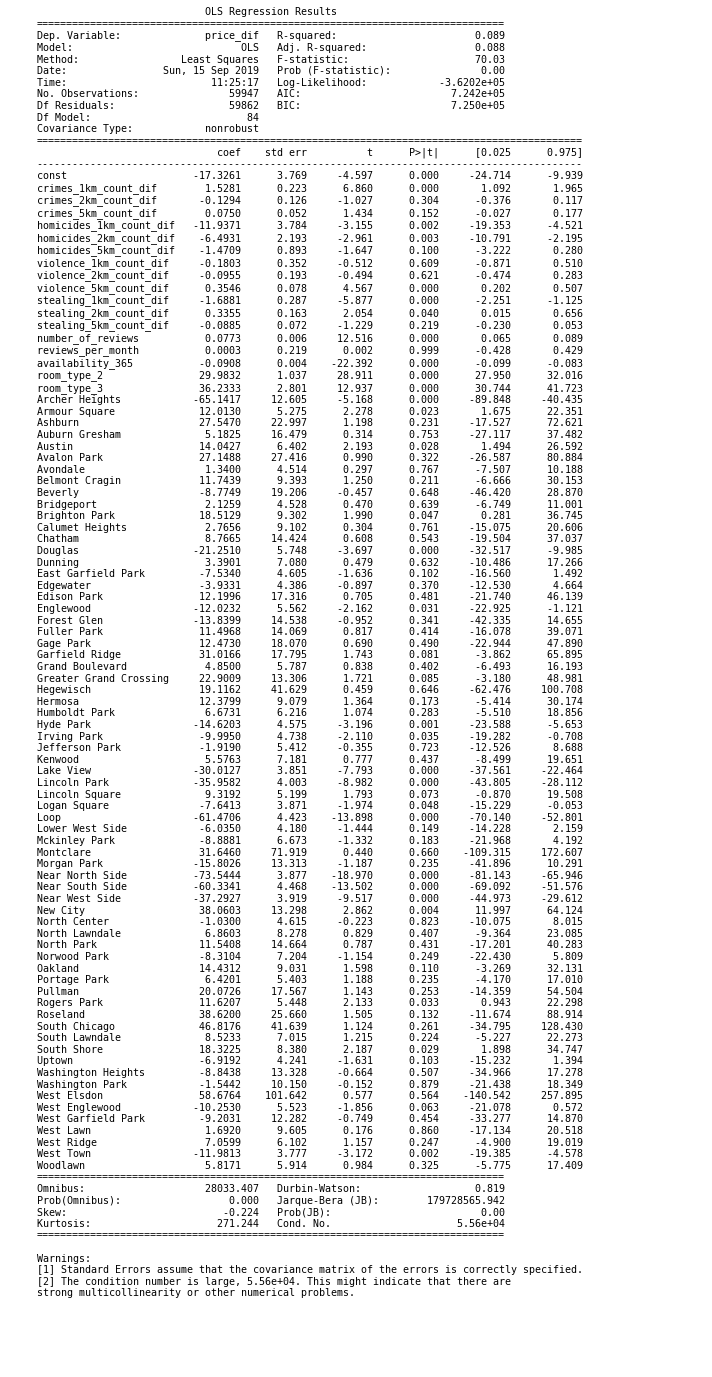

In [32]:
X = cal_change_r[['crimes_1km_count_dif','crimes_2km_count_dif','crimes_5km_count_dif',
               'homicides_1km_count_dif','homicides_2km_count_dif','homicides_5km_count_dif',
               'violence_1km_count_dif','violence_2km_count_dif','violence_5km_count_dif',
               'stealing_1km_count_dif','stealing_2km_count_dif','stealing_5km_count_dif',
               'room_type','neighbourhood','number_of_reviews','reviews_per_month','availability_365']]
y = cal_change_r[['price_dif']]

X = pd.concat([X, pd.get_dummies(X.room_type, prefix='room_type', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X.neighbourhood, drop_first=True)], axis=1)

X=X.drop(['neighbourhood','room_type'],axis=1)

reg = LinearRegression().fit(X, y)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

plt.rc('figure', figsize=(10, 20))
plt.text(0.01, 0.05, str(est2.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('reg2.png')

In [33]:
print(len(airbnb_cr))
print(len(listings))
print(len(listings.host_id.unique()))
print(len(listings[listings.room_type==1]))
print(len(listings[listings.room_type==2]))
print(len(listings[listings.room_type==3]))
print(len(airbnb_cr.listing_id.unique()))
print(len(crimes))
print(len(homicides))
print(len(stealing))
print(len(violence))
print(len(calendar))
print(len(cal_change_r[cal_change_r.room_type==1]))
print(len(cal_change_r[cal_change_r.room_type==2]))
print(len(cal_change_r[cal_change_r.room_type==3]))
print(len(cal_change_r.listing_id.unique()))

97060
5700
3378
3682
1810
208
4259
233314
551
88772
68425
7214635
42847
14893
2207
3893
